In [1]:
#modules
from requests import get
from bs4 import BeautifulSoup
import re
import networkx as nx
import matplotlib.pyplot as plt


g=nx.Graph()
#the graph of nodes
dict_likes={}
base_url='https://tastedive.com/like/'

# as an example we will map the recommendation map of Friends TV show
search_term = 'Friends'

In [2]:
# the plotting function
def get_recommendations(url,search_term):
    #using beautiful soup to parse the TasteDive page
    response = get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    #page_container is where all the recommendations are stored
    page_container = soup.find_all('div', class_='tk-Resource js-resource-card')  
    
    list_likes=[]
    
    for like in page_container[1:]:
        list_likes.append(like.span.text)

    dict_likes[search_term]=list_likes
    #adding the page's recommendation as nodes to the graph
    if search_term not in g:
        g.add_node(search_term)
    for like in list_likes:
        if like not in list_likes:
            g.add_node(like)
        if like not in g[search_term]:    
            g.add_edge(search_term,like)

In [3]:
#first original search term is Friends
#first iteraion
get_recommendations('https://tastedive.com/like/Friends-TV-Show',search_term)

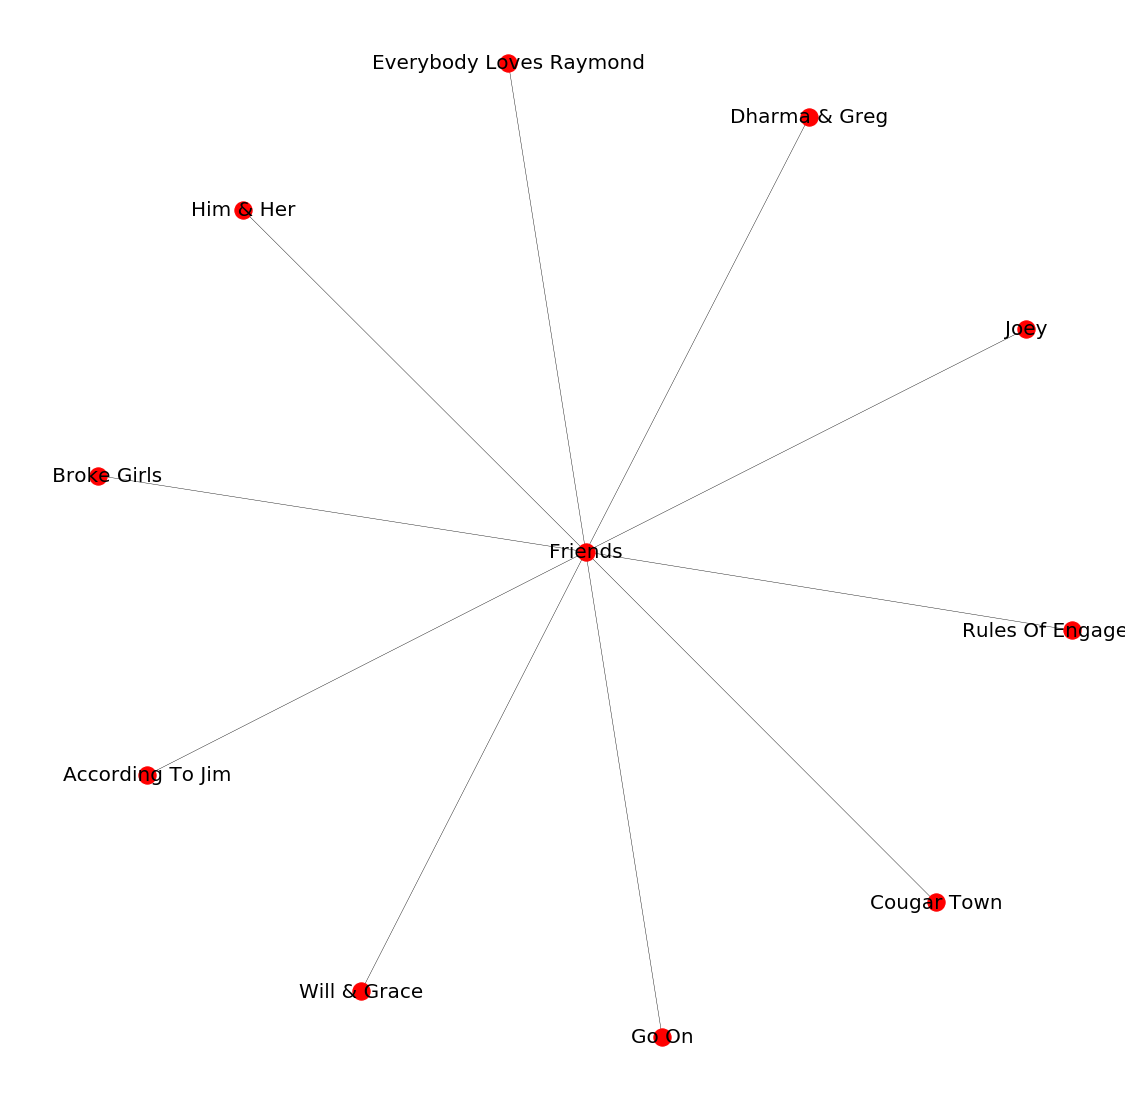

In [4]:
#drawing the first iteration graph
plt.figure(10,figsize=(15,15))
nx.draw_spring(g,width=0.4,with_labels=True,font_size=20)

In [5]:
#number of the nodes after the first iteration is 
print(len(g))

11


In [6]:
#second iteraion: for each one of therecommendation of the original_page 
#we apply the same algorithm ie: mapping their their own recommendations 
for recommendation in dict_likes[search_term]:
    get_recommendations(base_url+recommendation.replace(' ',''),recommendation)


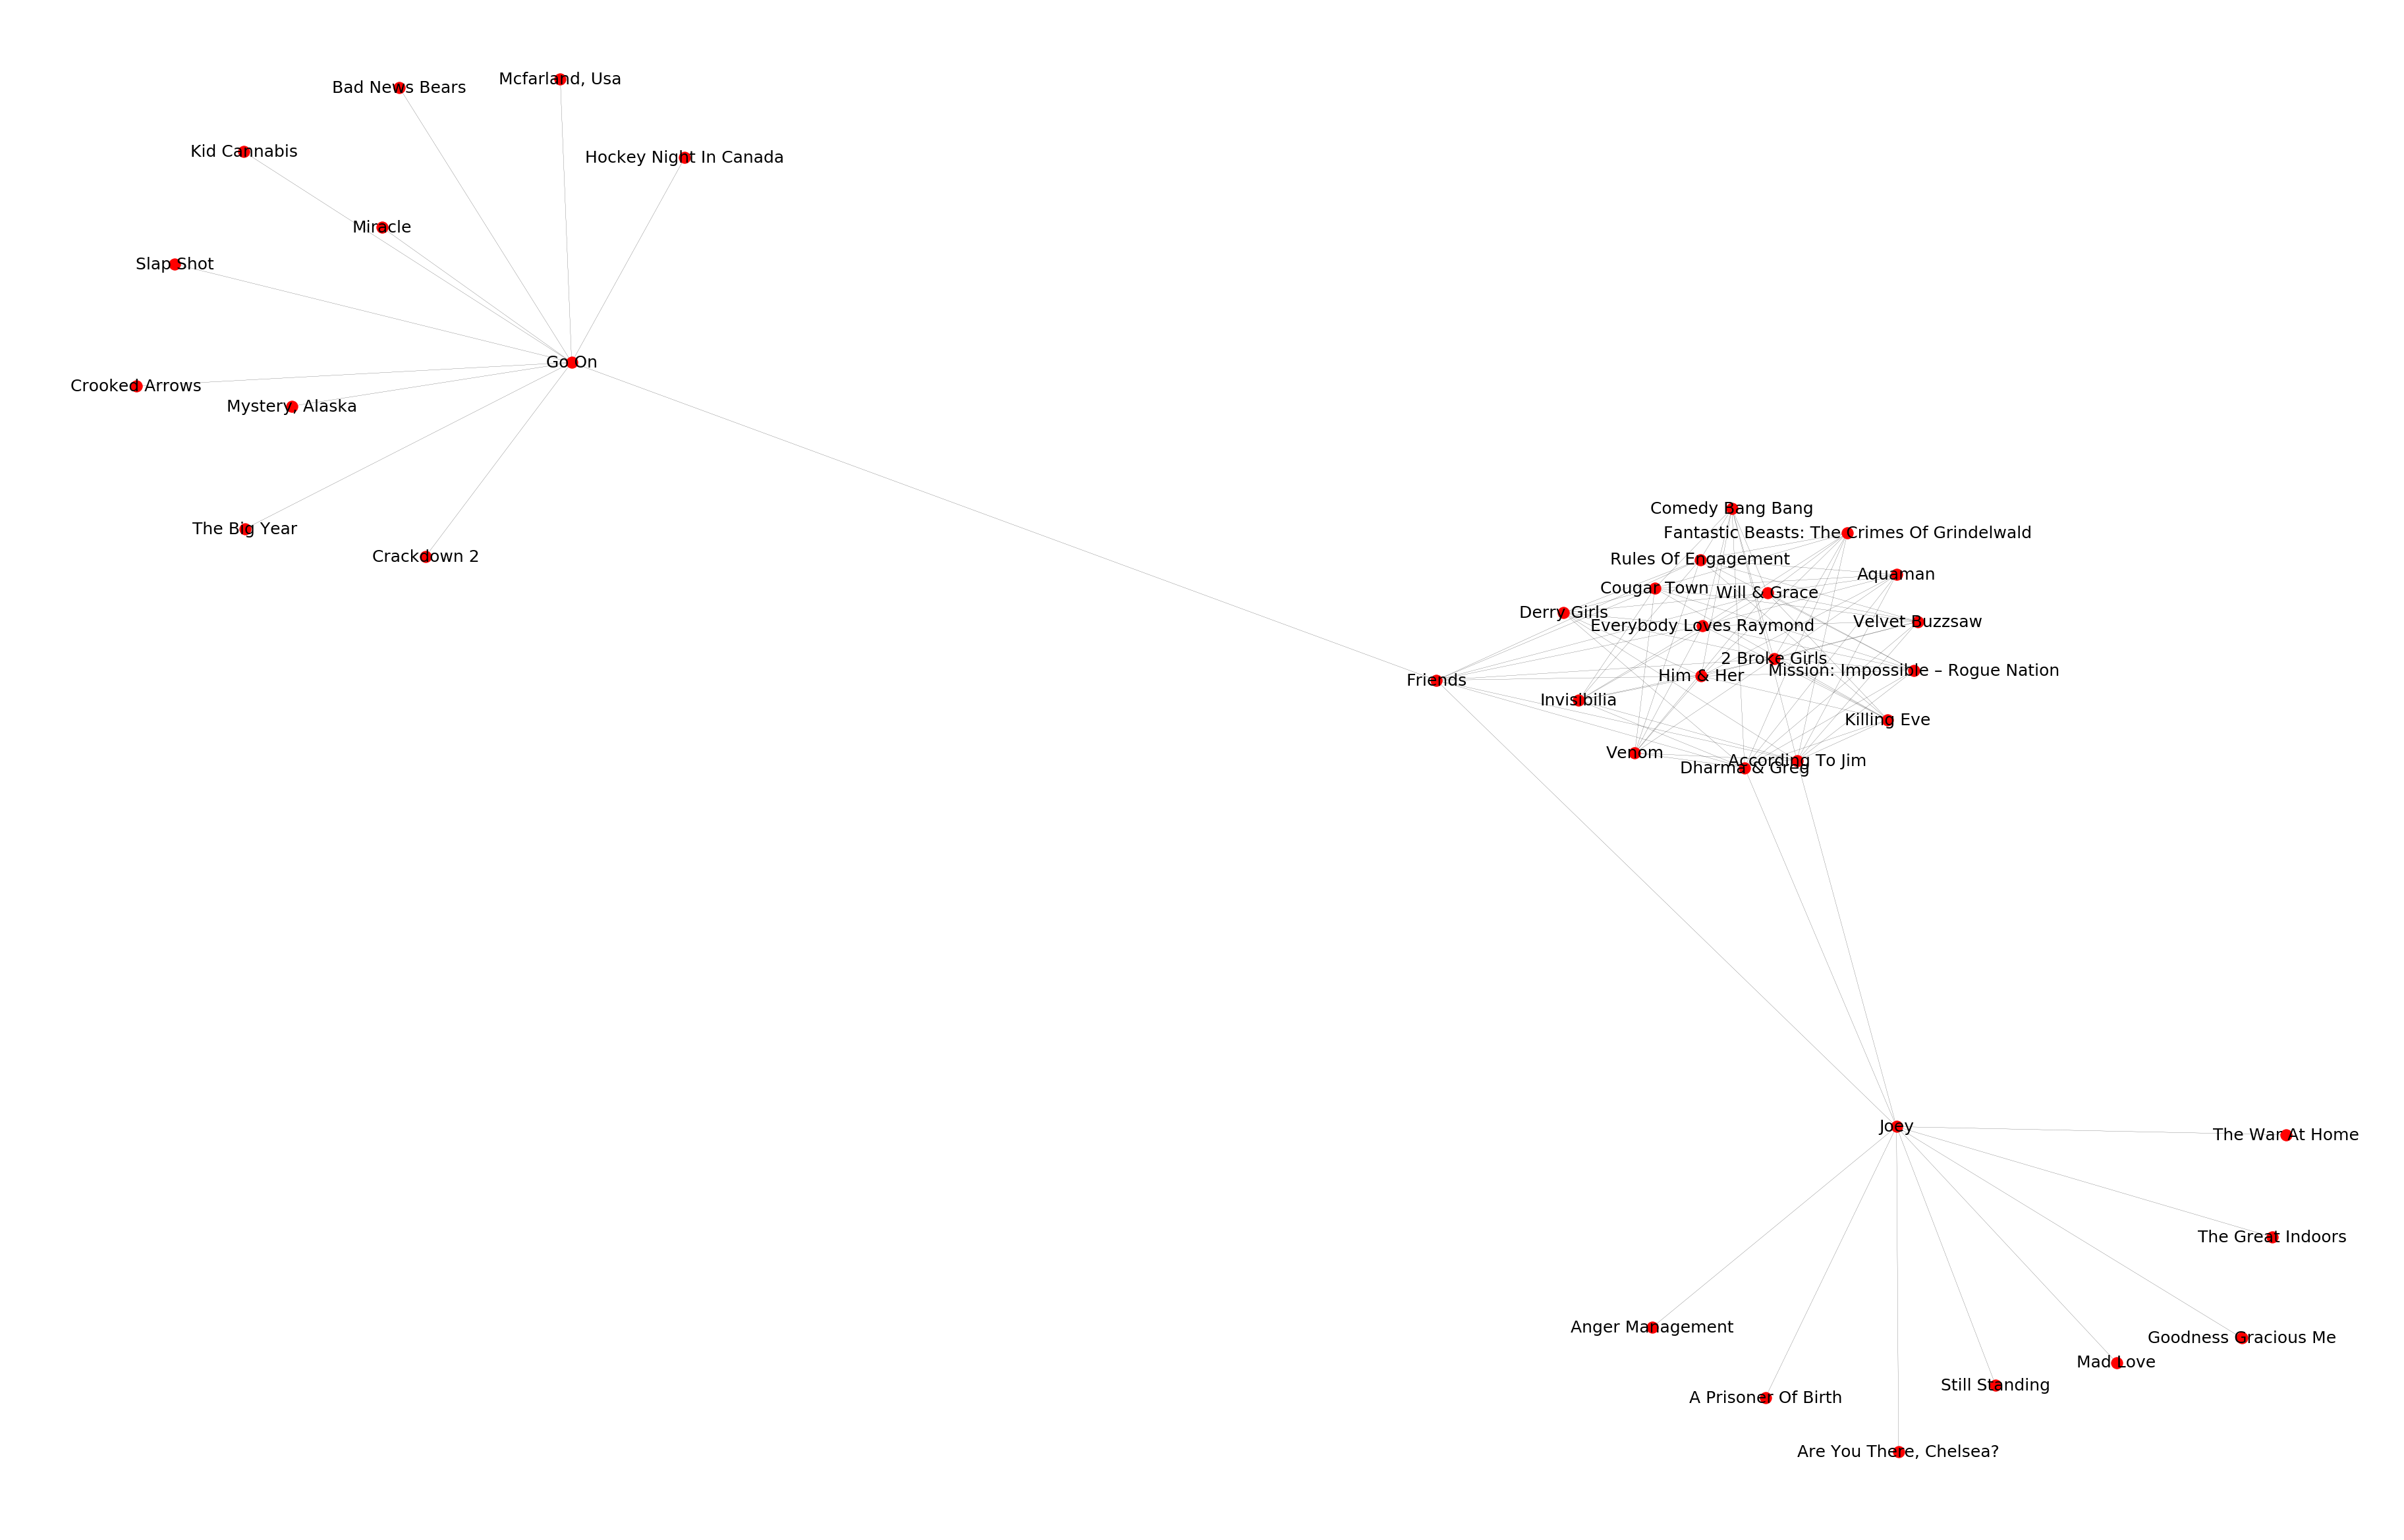

In [7]:
#drawing the second iteration graph
plt.figure(25,figsize=(50,32))
nx.draw_spring(g,width=0.2,with_labels=True,font_size=25)

In [8]:
#number of the nodes after the second iteration is 
print(len(g))

38


In [9]:
#the iteration function that replace the plotting and mapping
def iteration(dictionnary_of_nodes):
    for key in list(dict_likes.keys()):
        for  recommendation in dict_likes[key]:
            get_recommendations(base_url+ recommendation.replace(' ',''), recommendation)
    plt.figure(20,figsize=(89,60))
    nx.draw_spring(g,width=0.2,with_labels=True,font_size=10)

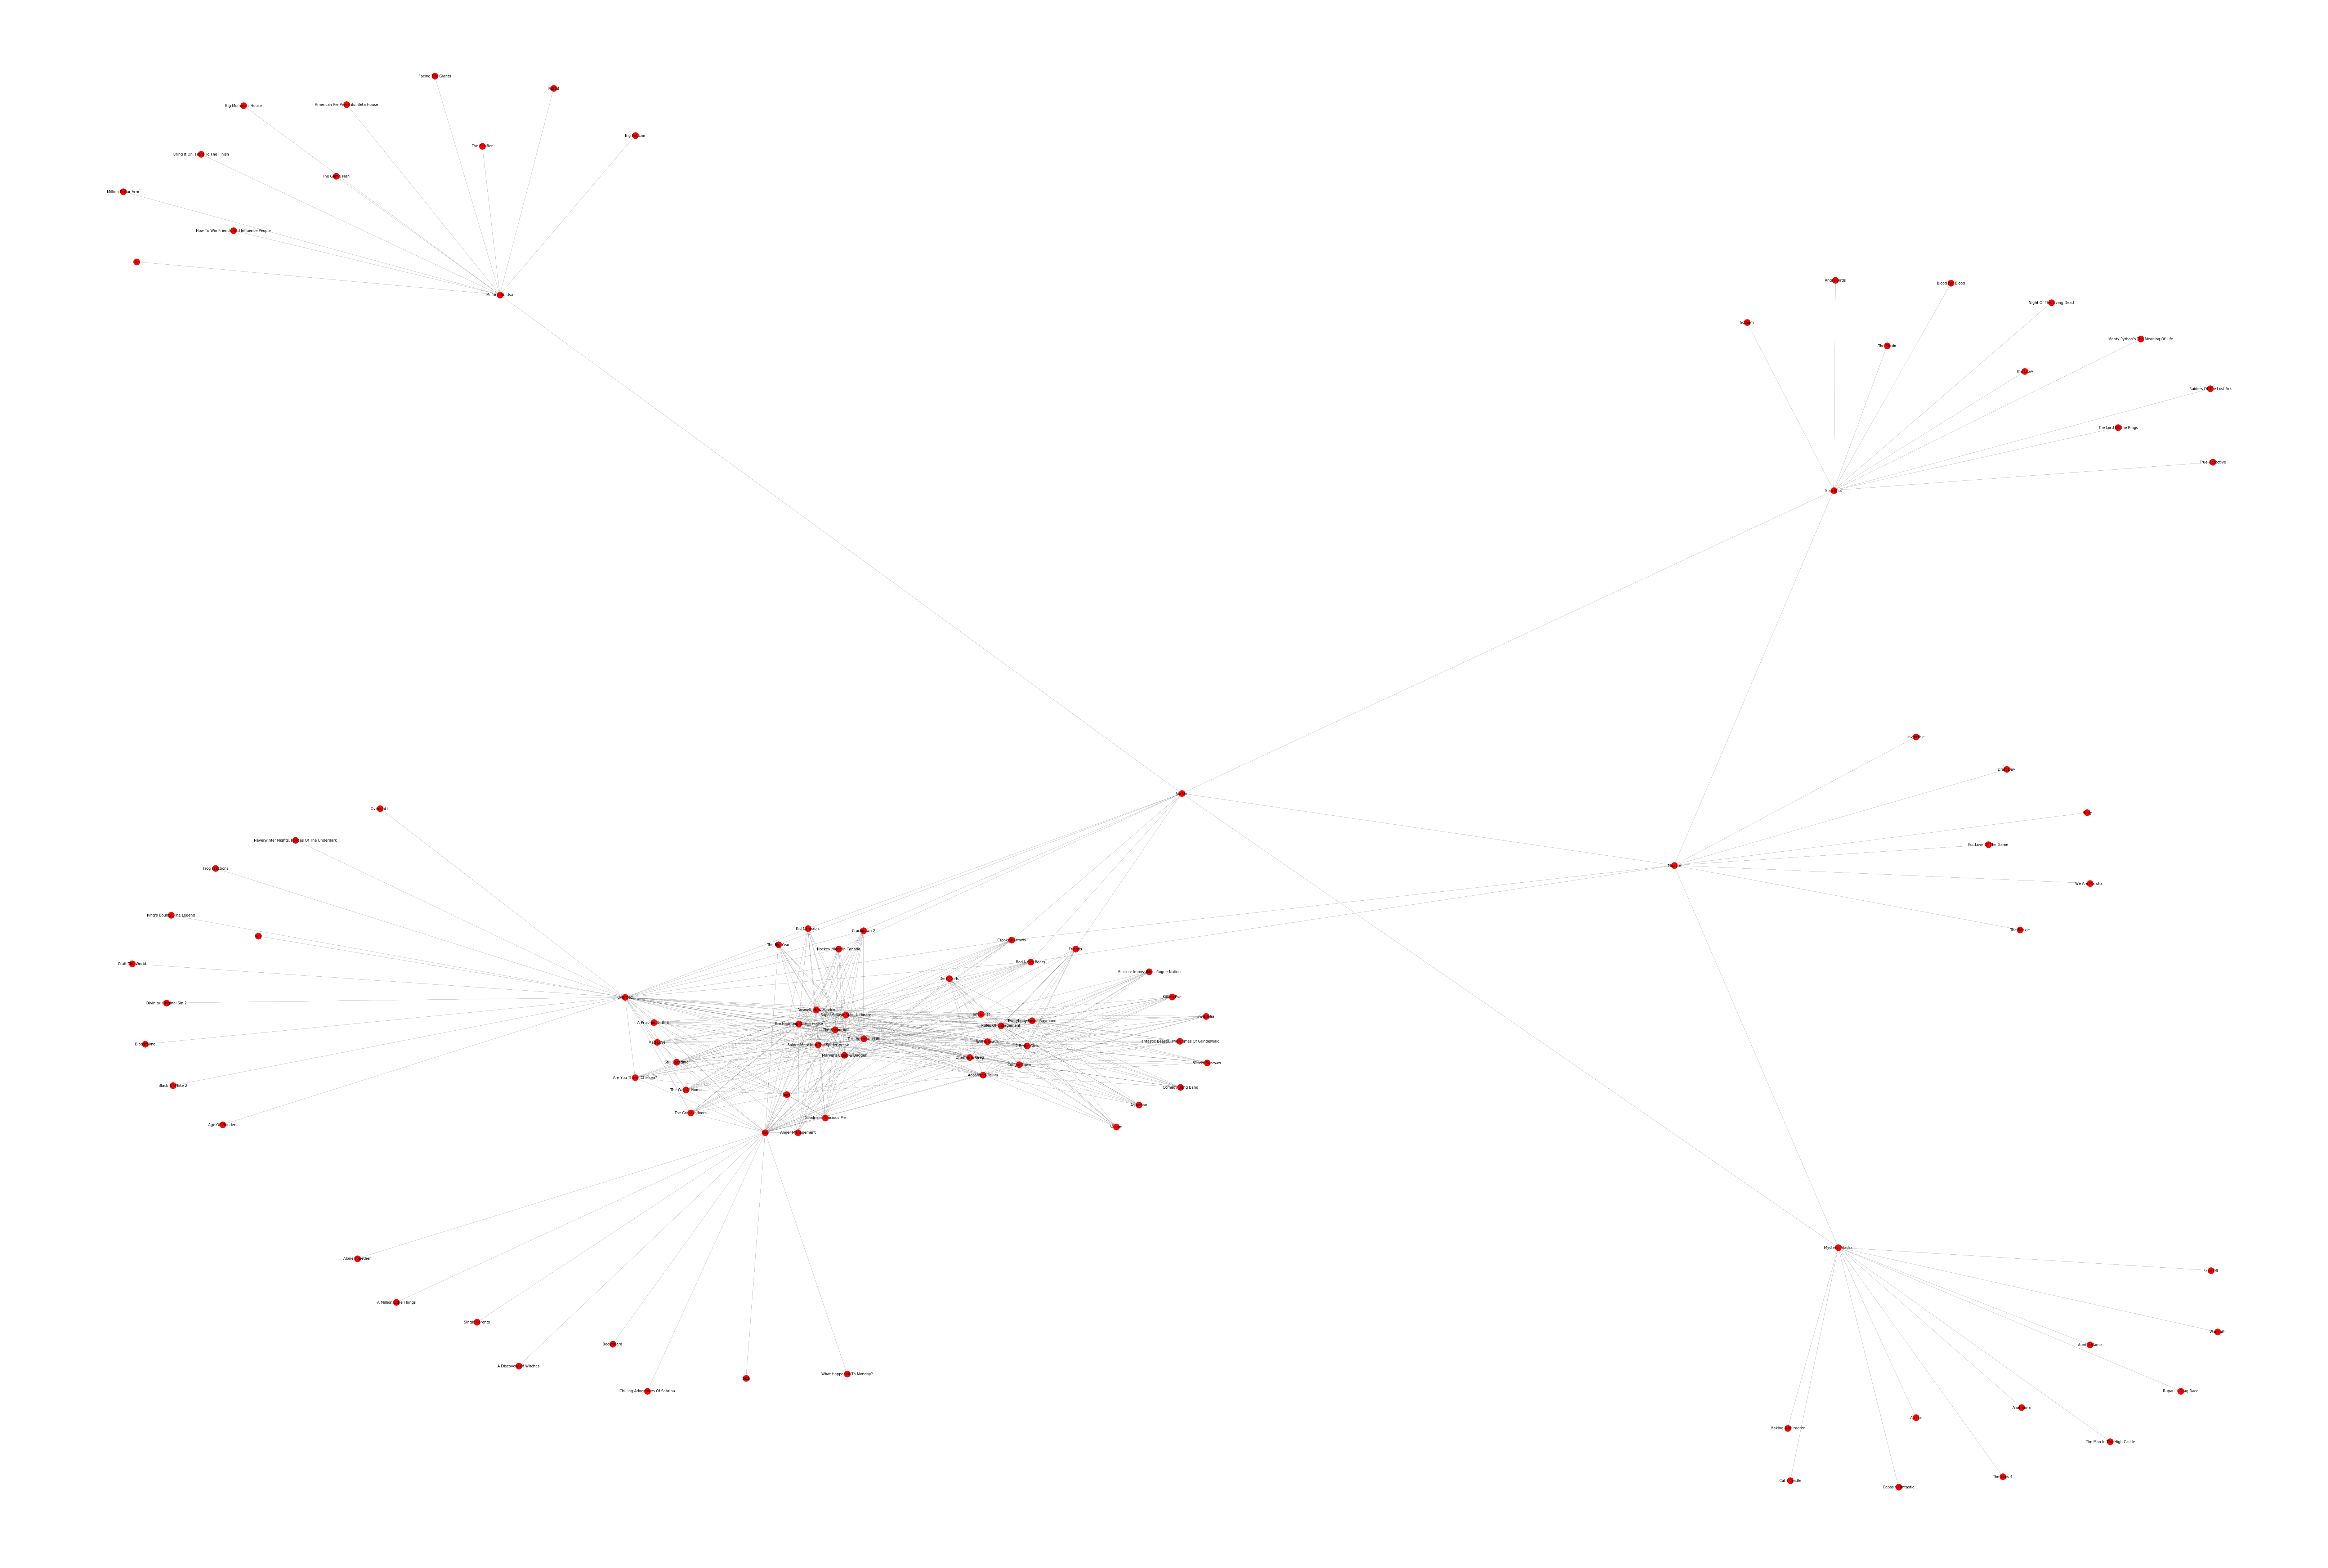

In [10]:
#the third iteration graph
iteration(dict_likes)

In [11]:
#number of the nodes after the third iteration is 
print(len(g))

103


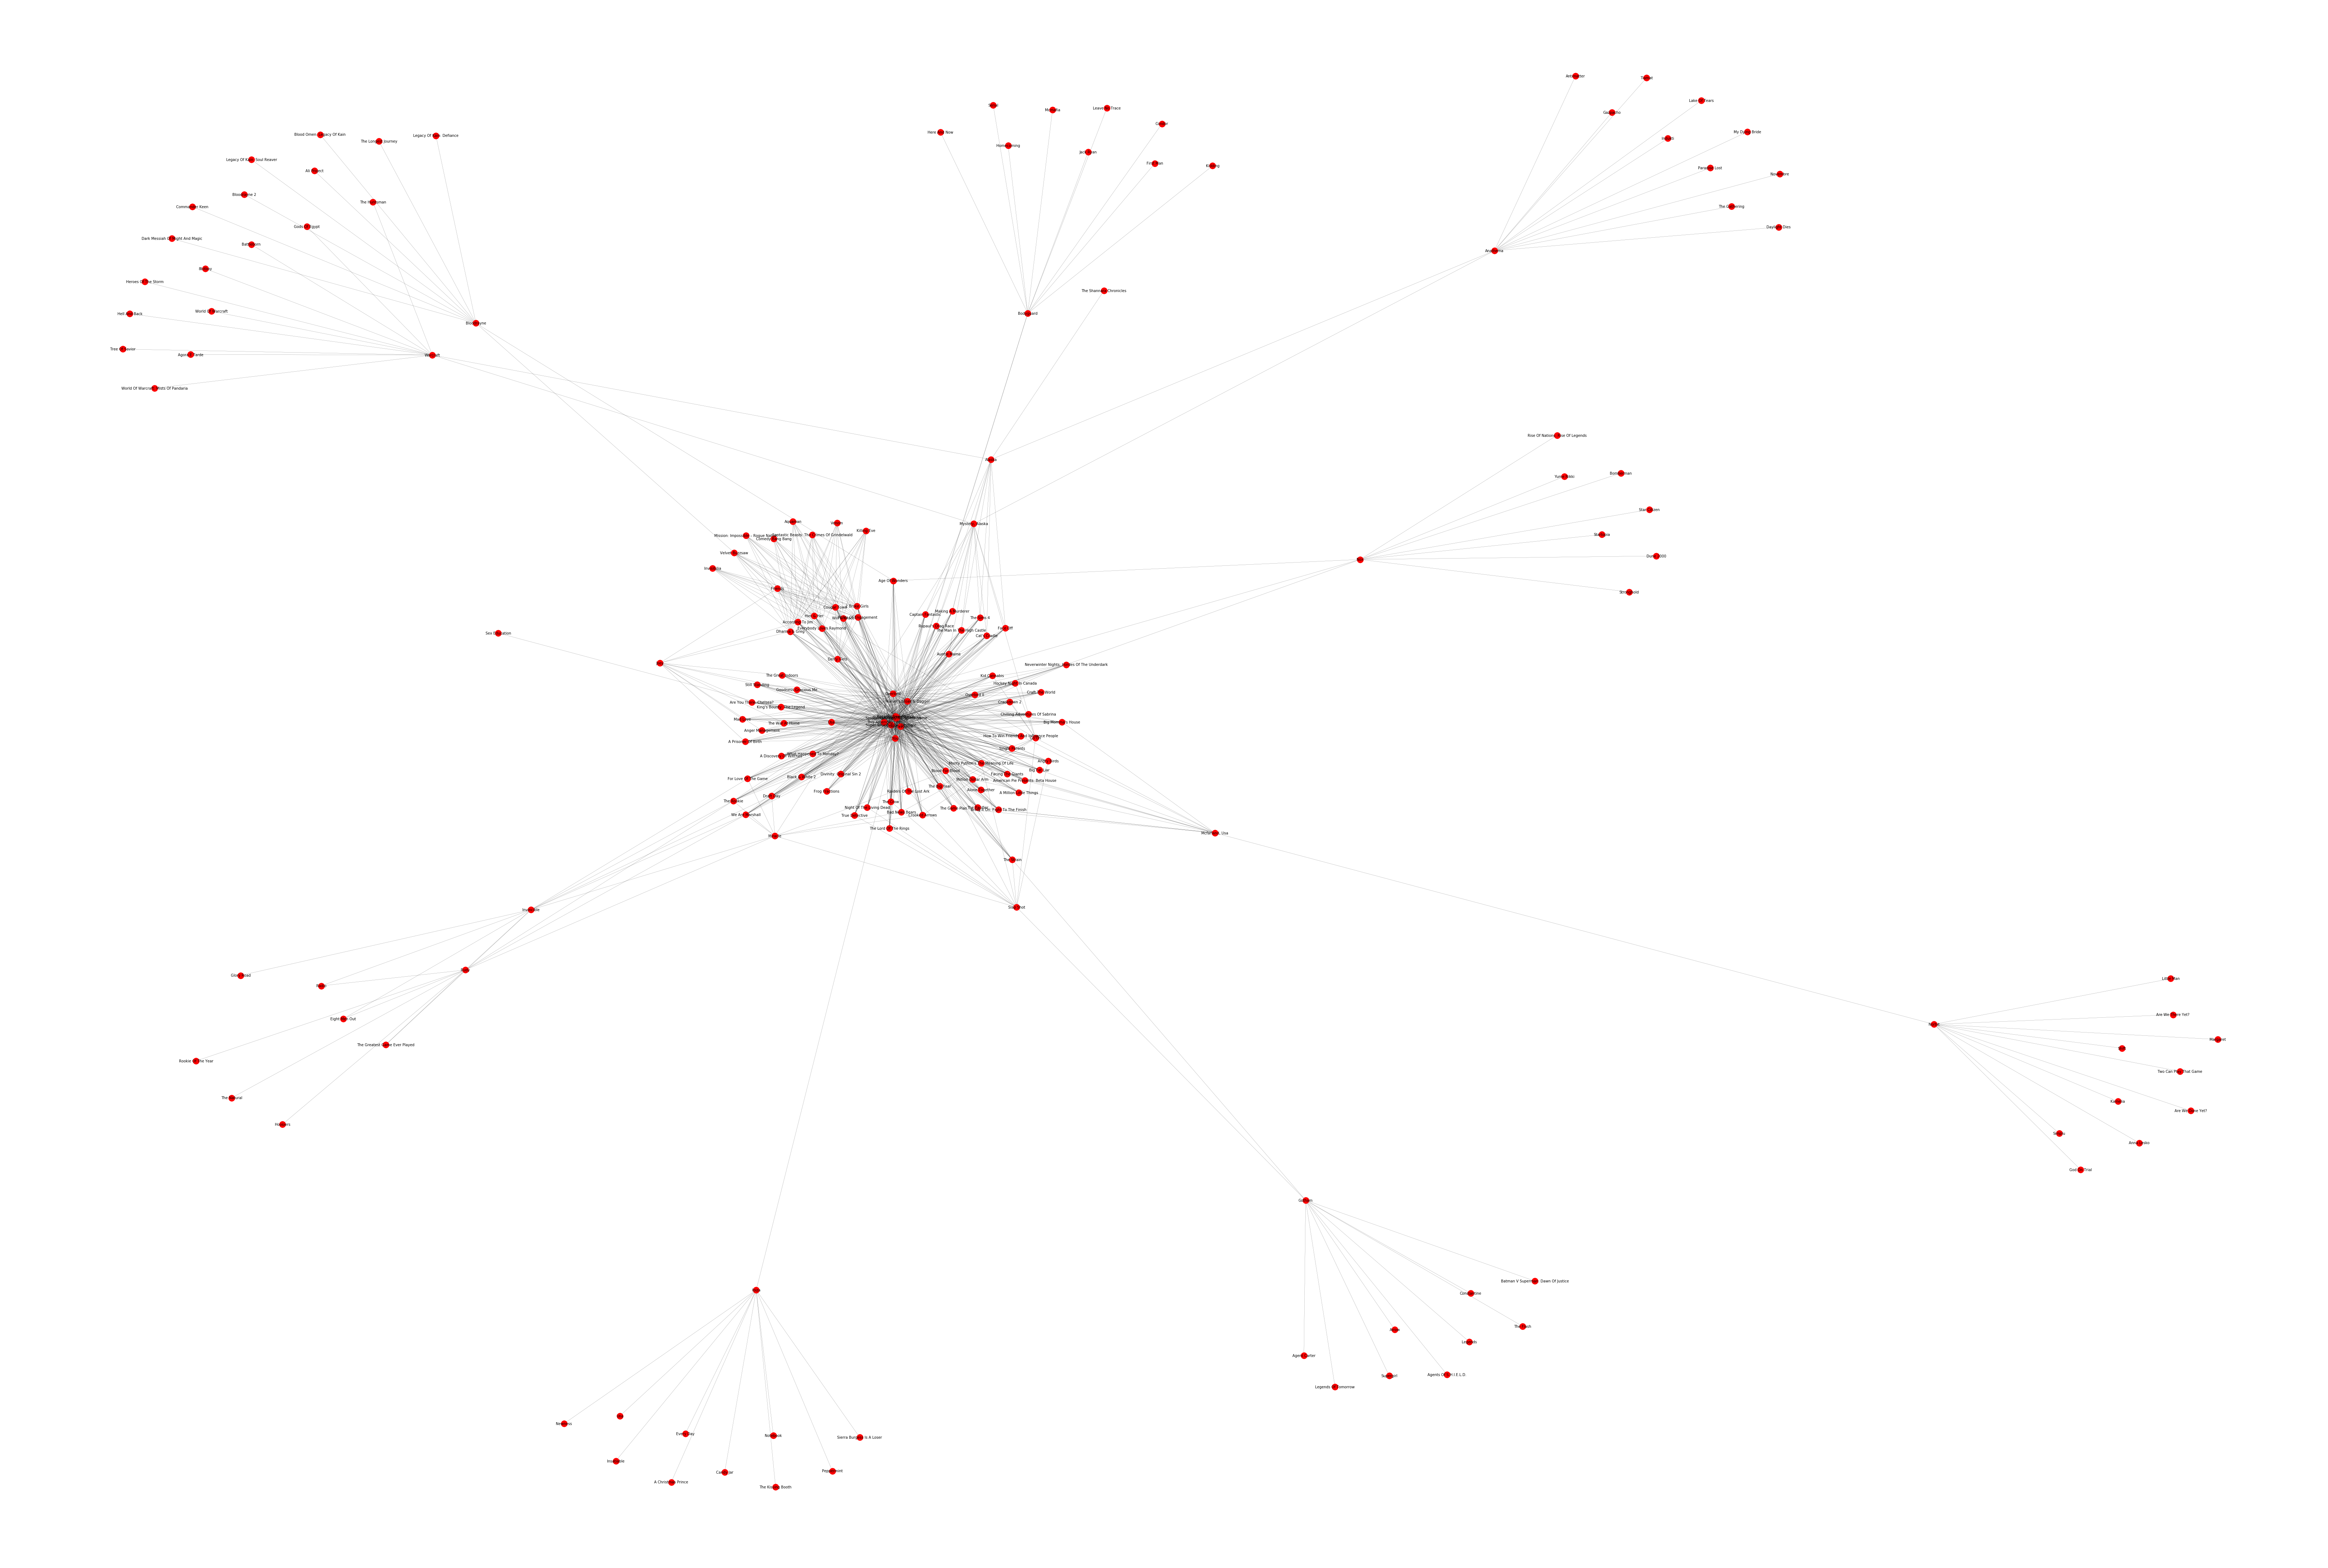

In [12]:
#4th iteration
iteration(dict_likes)

In [13]:
#number of the nodes after the fourth iteration is 
print(len(g))

185


In [14]:
plt.savefig("TasteDiveMap.png")

<Figure size 432x288 with 0 Axes>

In [16]:
#5th iteration
iteration(dict_likes)

KeyboardInterrupt: 

In [ ]:
plt.savefig('TasteDiveMap_1.png')

In [ ]:
#number of the nodes after the fifth iteration is 
print(len(g))

In [ ]:
#change of graph layout
plt.figure(20,figsize=(89,60))
nx.draw_random(g,width=0.2,with_labels=True,font_size=10)